# Data Transformation and Imports

In [43]:
import pandas as pd
import numpy as np
import sklearn


In [44]:
# File paths

unknown_well1 = pd.read_csv('/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/Unknown_1 (points).csv').drop(columns=['MD'])
unknown_well2 = pd.read_csv('/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/Unknown_2 (points).csv').drop(columns=['MD'])
files = [
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/LONCCARICA-1_planed (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/REZOVACCKE-1_planed (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/REZOVACCKE-2_planed (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/SUHOPOLJE-1_planed (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/VIROVITICA-1_planed (points).csv',
    '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/VIROVITICA-3ALFA_planed (points).csv'
]

# Load and process data
dataframes = []
for path in files:
    df = pd.read_csv(path).drop(columns=['MD'], errors='ignore')  # Drop 'MD' and 'holeid' if they exist
    dataframes.append(df)

# Combine dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Combine the 'GM_lthology' columns from all three dataframes
combined_gm_values = pd.concat([
    combined_df['GM_lthology'],
    unknown_well1['GM_lthology'],
    unknown_well2['GM_lthology']
])

# Fit the encoder on the combined values
label_encoder.fit(combined_gm_values)

# Transform the 'GM' columns in all three dataframes
combined_df['GM_lthology'] = label_encoder.transform(combined_df['GM_lthology'])
unknown_well1['GM_lthology'] = label_encoder.transform(unknown_well1['GM_lthology'])
unknown_well2['GM_lthology'] = label_encoder.transform(unknown_well2['GM_lthology'])

output_path = '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Porosity and Permability/features.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(output_path, index=False)

# Machine Learning Training and Evaluation

['VIROVITICA-1_planed' 'VIROVITICA-3ALFA_planed' 'REZOVACCKE-2_planed'
 'REZOVACCKE-1_planed']
Test HoleID: LONCCARICA-1_planed
Mean Squared Error (MSE): 187.04889974402604
R² Score: -243.9739604228467
------------------------------


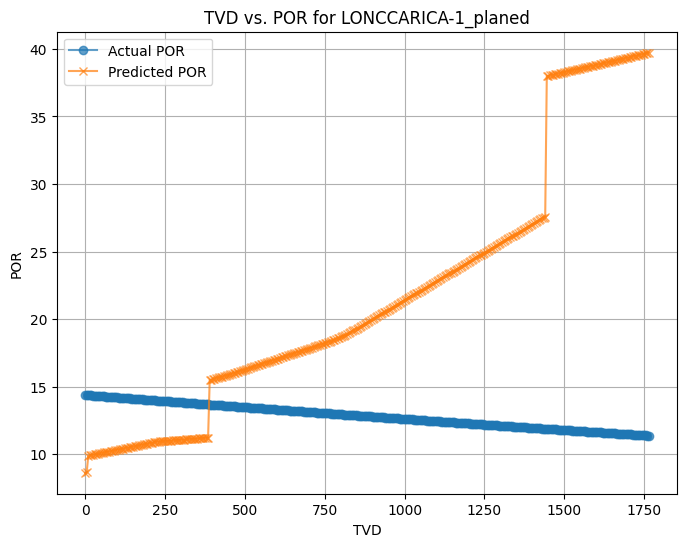

['REZOVACCKE-2_planed' 'VIROVITICA-3ALFA_planed' 'SUHOPOLJE-1_planed'
 'VIROVITICA-1_planed']
Test HoleID: REZOVACCKE-1_planed
Mean Squared Error (MSE): 752.5858162026751
R² Score: -6.154254049907402
------------------------------


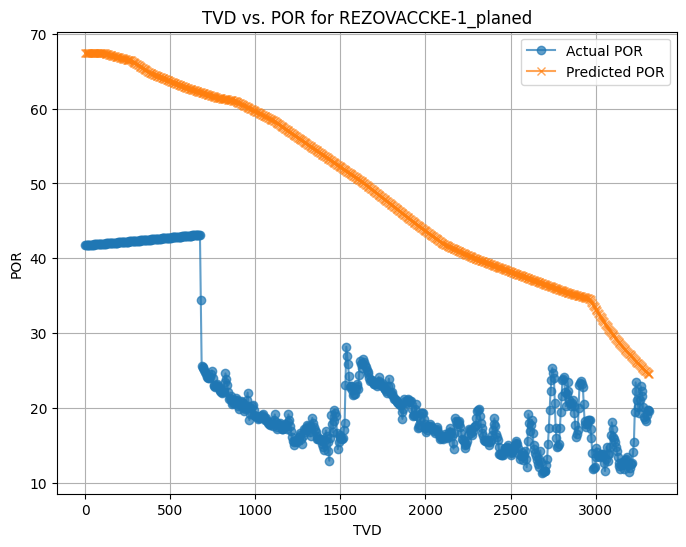

['REZOVACCKE-1_planed' 'VIROVITICA-3ALFA_planed' 'VIROVITICA-1_planed'
 'SUHOPOLJE-1_planed']
Test HoleID: REZOVACCKE-2_planed
Mean Squared Error (MSE): 95.48572279992223
R² Score: -0.3373087492765192
------------------------------


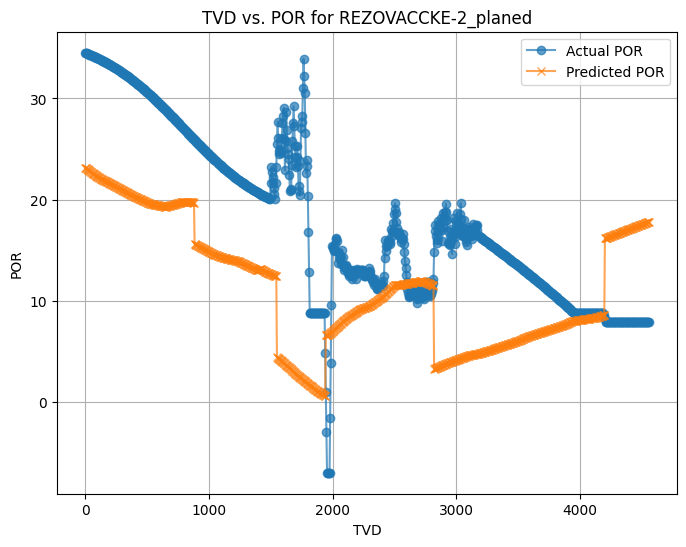

['REZOVACCKE-1_planed' 'REZOVACCKE-2_planed' 'VIROVITICA-3ALFA_planed'
 'VIROVITICA-1_planed']
Test HoleID: SUHOPOLJE-1_planed
Mean Squared Error (MSE): 180.48221580556344
R² Score: -4.906593014742874
------------------------------


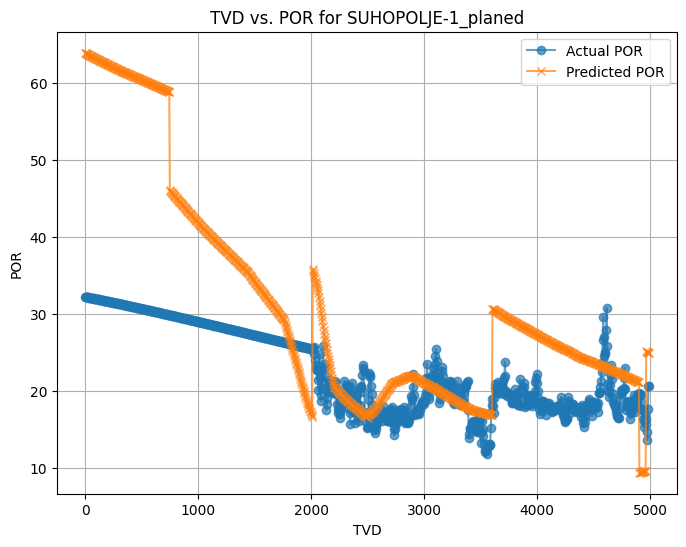

['VIROVITICA-3ALFA_planed' 'REZOVACCKE-2_planed' 'REZOVACCKE-1_planed'
 'LONCCARICA-1_planed']
Test HoleID: VIROVITICA-1_planed
Mean Squared Error (MSE): 8.896510023733574
R² Score: 0.40006189622120747
------------------------------


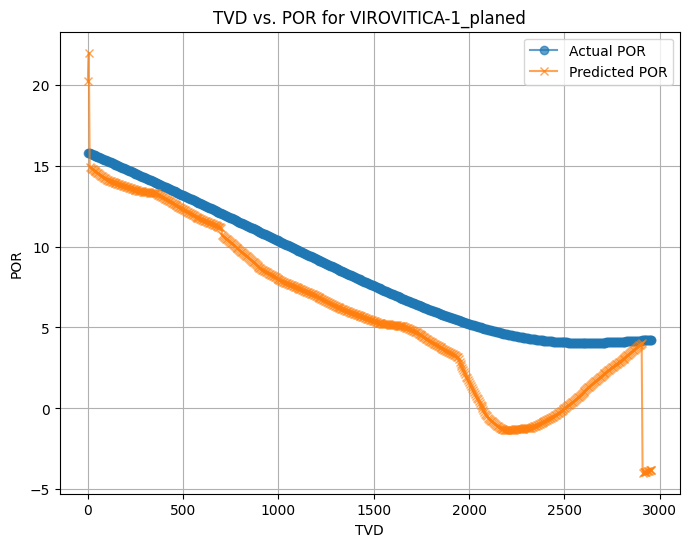

['VIROVITICA-1_planed' 'REZOVACCKE-2_planed' 'REZOVACCKE-1_planed'
 'LONCCARICA-1_planed']
Test HoleID: VIROVITICA-3ALFA_planed
Mean Squared Error (MSE): 10.626420940052517
R² Score: 0.6278253104387678
------------------------------


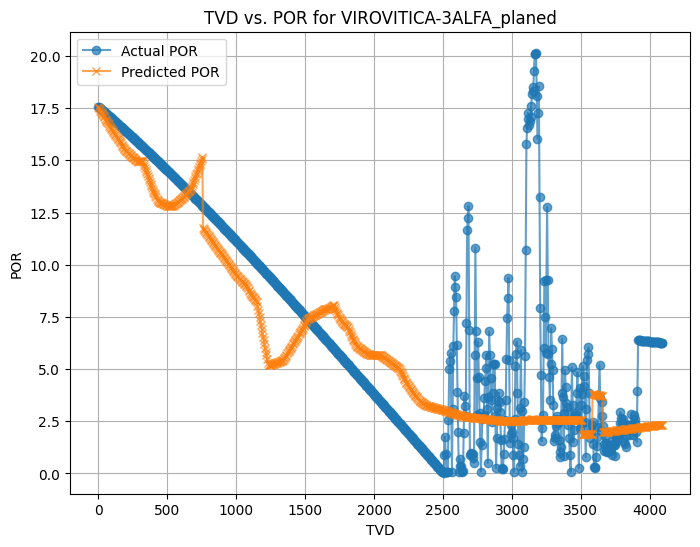

Overall Results:
                    holeid         mse          r2
0      LONCCARICA-1_planed  187.048900 -243.973960
1      REZOVACCKE-1_planed  752.585816   -6.154254
2      REZOVACCKE-2_planed   95.485723   -0.337309
3       SUHOPOLJE-1_planed  180.482216   -4.906593
4      VIROVITICA-1_planed    8.896510    0.400062
5  VIROVITICA-3ALFA_planed   10.626421    0.627825
Average MSE: 205.85426425266212
Average R² Score: -42.39070483835225


In [45]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of nearest neighbors to consider
k = 4  # You can adjust this based on your data

# Initialize metrics storage
results = []

# Extract unique holeids and their (x, y) coordinates
hole_coords = combined_df[['holeid', 'x', 'y']].drop_duplicates()

for test_holeid in hole_coords['holeid'].unique():
    # Extract the test well's coordinates
    test_coords = hole_coords[hole_coords['holeid'] == test_holeid][['x', 'y']].values

    # Exclude the test well from the training pool
    train_coords = hole_coords[hole_coords['holeid'] != test_holeid]

    # Find k-nearest neighbors based on (x, y) coordinates
    neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neighbors.fit(train_coords[['x', 'y']].values)
    distances, indices = neighbors.kneighbors(test_coords)

    # Get the k-nearest well IDs (excluding the test well)
    nearest_holeids = train_coords.iloc[indices.flatten()]['holeid'].values
    print(nearest_holeids)
    train_df = combined_df[combined_df['holeid'].isin(nearest_holeids)]

    # Test data is still the test well
    test_df = combined_df[combined_df['holeid'] == test_holeid]

    # Separate features and target for training and testing
    X_train = train_df.drop(columns=['holeid','PERM','z','POR'])
    y_train = train_df['POR']
    X_test = test_df.drop(columns=['holeid', 'PERM', 'z','POR'])
    y_test = test_df['POR']
    tvd_test = test_df['TVD']  # Extract TVD for plotting


    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the model
    mlp = MLPRegressor(
        hidden_layer_sizes=(100,50,25),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42,
        learning_rate='constant'
    )



    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test HoleID: {test_holeid}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print("-" * 30)

     # Store the results
    results.append({'holeid': test_holeid, 'mse': mse, 'r2': r2})

    # Plot TVD vs Actual POR and Predicted POR
    plt.figure(figsize=(8, 6))
    plt.plot(tvd_test, y_test, 'o-', label="Actual POR", alpha=0.7)
    plt.plot(tvd_test, y_pred, 'x-', label="Predicted POR", alpha=0.7)
    plt.xlabel("TVD")
    plt.ylabel("POR")
    plt.title(f"TVD vs. POR for {test_holeid}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Aggregate results
results_df = pd.DataFrame(results)
print("Overall Results:")
print(results_df)
print(f"Average MSE: {results_df['mse'].mean()}")
print(f"Average R² Score: {results_df['r2'].mean()}")


In [46]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Number of nearest neighbors to consider
k = 6  # Adjust this based on your data

# Separate the known and unknown wells
known_wells = combined_df[combined_df['POR'].notna()]  # Wells with known temperatures


# Assign unique hole IDs for the unknown wells
unknown_well1['holeid'] = 'Unknown-1'
unknown_well2['holeid'] = 'Unknown-2'

# Combine unknown wells into a single DataFrame
unknown_wells = pd.concat([unknown_well1, unknown_well2], ignore_index=True)

# Extract coordinates for known wells
known_coords = known_wells[['holeid', 'x', 'y']].drop_duplicates()

# Iterate through each unknown well
predictions = []
for unknown_holeid in unknown_wells['holeid'].unique():
    # Extract the coordinates of the unknown well
    unknown_coords = unknown_wells[unknown_wells['holeid'] == unknown_holeid][['x', 'y']].iloc[0].values

    # Find k-nearest neighbors based on (x, y) coordinates
    neighbors = NearestNeighbors(n_neighbors=k, metric='euclidean')
    neighbors.fit(known_coords[['x', 'y']].values)
    distances, indices = neighbors.kneighbors([unknown_coords])

    # Get the k-nearest well IDs
    nearest_holeids = known_coords.iloc[indices.flatten()]['holeid'].values
    print(f"Nearest neighbors for unknown well {unknown_holeid}: {nearest_holeids}")

    # Training data: all samples from the nearest wells
    train_df = known_wells[known_wells['holeid'].isin(nearest_holeids)]
    test_df = unknown_wells[unknown_wells['holeid'] == unknown_holeid]

    # Separate features and target for training and testing
    X_train = train_df.drop(columns=['holeid','PERM','z','POR', 'x','y'], errors='ignore')
    y_train = train_df['POR']
    X_test = test_df.drop(columns=['holeid','z', 'x','y'], errors='ignore')

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the neural network model
    mlp = MLPRegressor(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        learning_rate='constant'
    )
    mlp.fit(X_train, y_train)

    # Predict the temperature for the unknown well
    y_pred = mlp.predict(X_test)

    # Store the predictions
    for idx, temp_pred in enumerate(y_pred):
        predictions.append({'holeid': unknown_holeid, 'Depth': idx, 'POR': temp_pred})

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)
print("Predictions for Unknown Wells:")
print(predictions_df)


Nearest neighbors for unknown well Unknown-1: ['VIROVITICA-1_planed' 'VIROVITICA-3ALFA_planed' 'LONCCARICA-1_planed'
 'REZOVACCKE-2_planed' 'REZOVACCKE-1_planed' 'SUHOPOLJE-1_planed']
Nearest neighbors for unknown well Unknown-2: ['SUHOPOLJE-1_planed' 'REZOVACCKE-1_planed' 'REZOVACCKE-2_planed'
 'VIROVITICA-3ALFA_planed' 'VIROVITICA-1_planed' 'LONCCARICA-1_planed']
Predictions for Unknown Wells:
         holeid  Depth        POR
0     Unknown-1      0  22.986616
1     Unknown-1      1  22.954972
2     Unknown-1      2  22.923327
3     Unknown-1      3  22.891812
4     Unknown-1      4  22.861528
...         ...    ...        ...
1531  Unknown-2   1110  12.987702
1532  Unknown-2   1111  13.031258
1533  Unknown-2   1112  13.074814
1534  Unknown-2   1113  13.118370
1535  Unknown-2   1114  13.161926

[1536 rows x 3 columns]


Predictions for Unknown Well 1 saved to: /Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Unknown Wells/predictionsUW1_POR.csv
Predictions for Unknown Well 2 saved to: /Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Unknown Wells/predictionsUW2_POR.csv


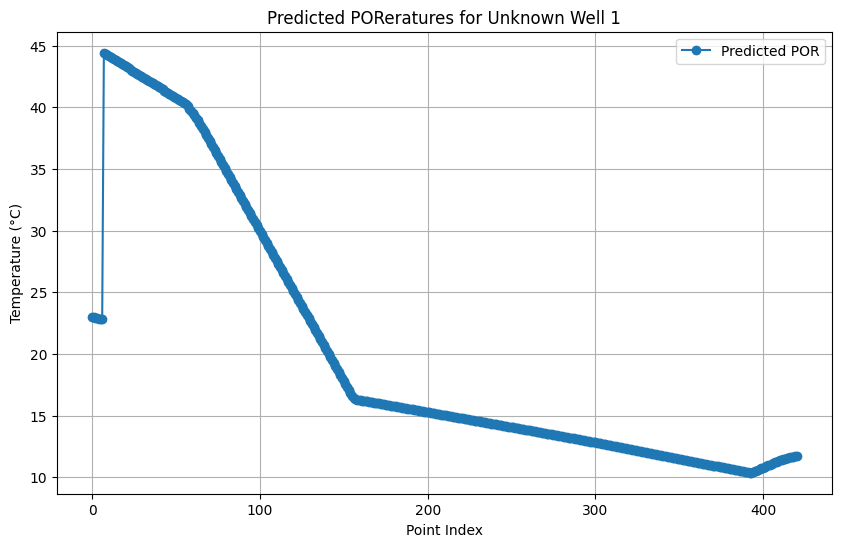

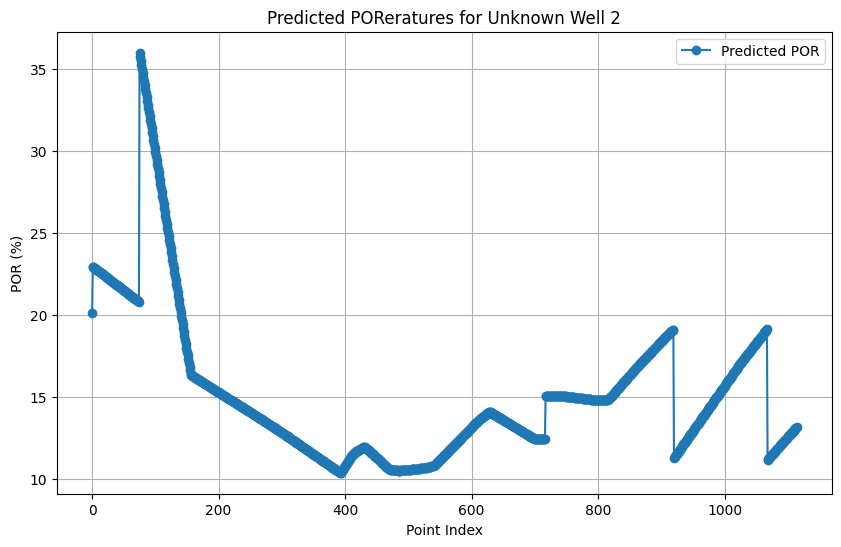

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Output paths for saving predictions
output_path_u1 = "/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Unknown Wells/predictionsUW1_POR.csv"
output_path_u2 = "/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/geohackathon2024/DataLeapfrog/Unknown Wells/predictionsUW2_POR.csv"

# Convert predictions list to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Filter predictions for each unknown well
POR_pred_u1 = predictions_df[predictions_df['holeid'] == 'Unknown-1']
POR_pred_u2 = predictions_df[predictions_df['holeid'] == 'Unknown-2']

# Save predictions to CSV files
POR_pred_u1.to_csv(output_path_u1, index=False)
print(f"Predictions for Unknown Well 1 saved to: {output_path_u1}")

POR_pred_u2.to_csv(output_path_u2, index=False)
print(f"Predictions for Unknown Well 2 saved to: {output_path_u2}")

# Visualize predictions for Unknown Well 1
plt.figure(figsize=(10, 6))
plt.plot(POR_pred_u1['Depth'], POR_pred_u1['POR'], marker='o', label='Predicted POR')
plt.title("Predicted POReratures for Unknown Well 1")
plt.xlabel("Point Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.savefig("/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/PredictionsUW1_Visualization.png")
plt.show()

# Visualize predictions for Unknown Well 2
plt.figure(figsize=(10, 6))
plt.plot(POR_pred_u2['Depth'], POR_pred_u2['POR'], marker='o', label='Predicted POR')
plt.title("Predicted POReratures for Unknown Well 2")
plt.xlabel("Point Index")
plt.ylabel("POR (%)")
plt.grid(True)
plt.legend()
plt.savefig("/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/PredictionsUW2_Visualization_POR.png")
plt.show()


In [48]:
#Finding average porosity

# Compute the average PERM and POR for each well (hole_id assumed as identifier)
averages_known_wells = combined_df.groupby('holeid')[['PERM', 'POR']].mean().reset_index()
averages_known_wells.rename(columns={'PERM': 'Average PERM', 'POR': 'Average POR'}, inplace=True)

# Print the results for known wells
print("Averages for known wells:")
print(averages_known_wells)

average_unknown1 = POR_pred_u1["POR"].mean()
print(average_unknown1)
average_unknown2 = POR_pred_u2["POR"].mean()
print(average_unknown2)



Averages for known wells:
                    holeid  Average PERM  Average POR
0      LONCCARICA-1_planed     16.234621    12.829493
1      REZOVACCKE-1_planed     13.874210    23.259630
2      REZOVACCKE-2_planed      9.154949    17.939269
3       SUHOPOLJE-1_planed      7.878824    22.809126
4      VIROVITICA-1_planed      9.492787     8.418620
5  VIROVITICA-3ALFA_planed      6.282895     7.322409
20.39732306450913
15.162724902348096
